# Import Library

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [2]:
df = pd.read_csv('/content/motor_second.csv')
df.head()

,model,tahun,harga,transmisi,odometer,jenis,pajak,konsumsiBBM,mesin
0,Supra X 125,2017,7999,Manual,17307,Bebek,145.0,58.9,125.0
1,Vario 125,2016,14499,Automatic,25233,Skuter,235.0,43.5,125.0
2,Vario 125,2016,11399,Automatic,37877,Skuter,30.0,61.7,125.0
3,Revo,2016,6499,Manual,23789,Bebek,20.0,60.1,110.0
4,PCX,2015,10199,Automatic,33177,Skuter,160.0,51.4,150.0


# Preprocessing

In [5]:
df.isnull().sum()

,0
model,0
tahun,0
harga,0
transmisi,0
odometer,0
jenis,0
pajak,0
konsumsiBBM,0
mesin,0


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df['pajak'] = df['pajak'].astype(int)
df['mesin'] = df['mesin'].astype(int)

# Feature Engineering

In [8]:
current_year = 2024
df['usia_motor'] = current_year - df['tahun']
print(f"Kolom 'usia_motor' (tahun saat ini: {current_year}) berhasil dibuat.")

Kolom 'usia_motor' (tahun saat ini: 2024) berhasil dibuat.


In [11]:
bins = [0, 10000, 30000, 50000, np.inf]
labels = ['Sangat Rendah (<10K)', 'Rendah (10K-30K)', 'Sedang (30K-50K)', 'Tinggi (>50K)']
df['kategori_odometer'] = pd.cut(df['odometer'], bins=bins, labels=labels, right=False)

# EDA & Statistik

In [12]:
numerical_cols = ['harga', 'odometer', 'usia_motor', 'pajak', 'konsumsiBBM', 'mesin']
print("\nStatistik Deskriptif (Numerik):")
print(df[numerical_cols].describe().T)

print("\nDistribusi Jenis Motor:")
print(df['jenis'].value_counts())
print("-" * 50)


Statistik Deskriptif (Numerik):
             count          mean           std     min      25%      50%  \
harga        199.0  11385.015075   4534.671984  3799.0   7996.5  10998.0   
odometer     199.0  23468.306533  15689.247247  1391.0  12696.0  21119.0   
usia_motor   199.0      7.381910      1.712955     5.0      6.0      7.0   
pajak        199.0    110.391960     63.604024     0.0     30.0    145.0   
konsumsiBBM  199.0     53.905528     11.819869    28.0     44.8     56.5   
mesin        199.0    123.919598     16.778822     0.0    110.0    125.0   

                 75%       max  
harga        14498.5   34998.0  
odometer     32103.0  119050.0  
usia_motor       8.0      13.0  
pajak          145.0     300.0  
konsumsiBBM     60.1     125.0  
mesin          125.0     150.0  

Distribusi Jenis Motor:
jenis
Skuter    107
Bebek      75
Sport      11
Trail       6
Name: count, dtype: int64
--------------------------------------------------


# Korelasi Data

In [16]:
correlation_matrix = df[numerical_cols].corr()
print("\nMatriks Korelasi Numerik:")
print(correlation_matrix)


Matriks Korelasi Numerik:
                harga  odometer  usia_motor     pajak  konsumsiBBM     mesin
harga        1.000000 -0.426539   -0.572155  0.353530    -0.376568  0.395155
odometer    -0.426539  1.000000    0.634887 -0.077990     0.158540  0.148488
usia_motor  -0.572155  0.634887    1.000000 -0.228895     0.228437  0.027608
pajak        0.353530 -0.077990   -0.228895  1.000000    -0.574941  0.254415
konsumsiBBM -0.376568  0.158540    0.228437 -0.574941     1.000000 -0.246761
mesin        0.395155  0.148488    0.027608  0.254415    -0.246761  1.000000


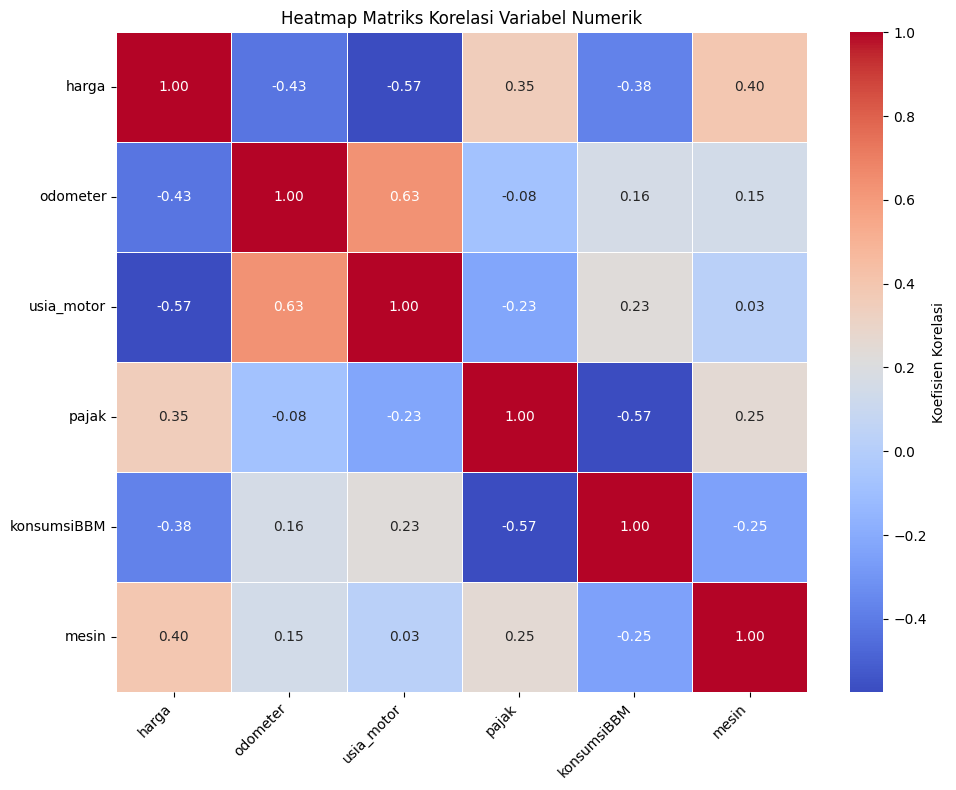

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=.5,
    cbar_kws={'label': 'Koefisien Korelasi'}
)
plt.title('Heatmap Matriks Korelasi Variabel Numerik')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Visualisasi Data

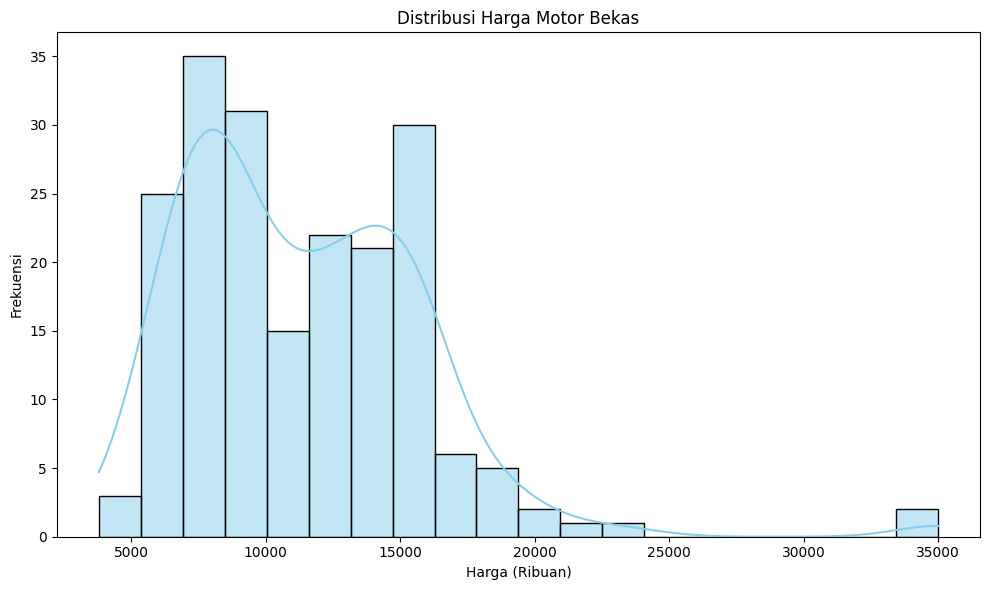

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df['harga'], kde=True, bins=20, color='skyblue')
plt.title('Distribusi Harga Motor Bekas')
plt.xlabel('Harga (Ribuan)')
plt.ylabel('Frekuensi')
plt.tight_layout()

/tmp/ipython-input-3769654864.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_jenis.index, y=avg_price_by_jenis.values, palette='viridis')


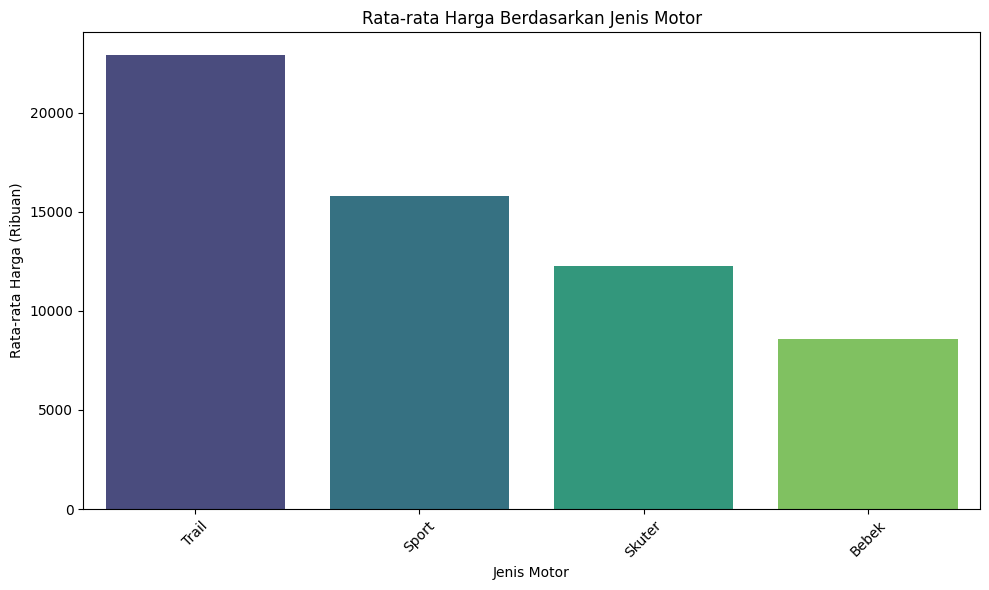

In [14]:
avg_price_by_jenis = df.groupby('jenis')['harga'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_by_jenis.index, y=avg_price_by_jenis.values, palette='viridis')
plt.title('Rata-rata Harga Berdasarkan Jenis Motor')
plt.xlabel('Jenis Motor')
plt.ylabel('Rata-rata Harga (Ribuan)')
plt.xticks(rotation=45)
plt.tight_layout()

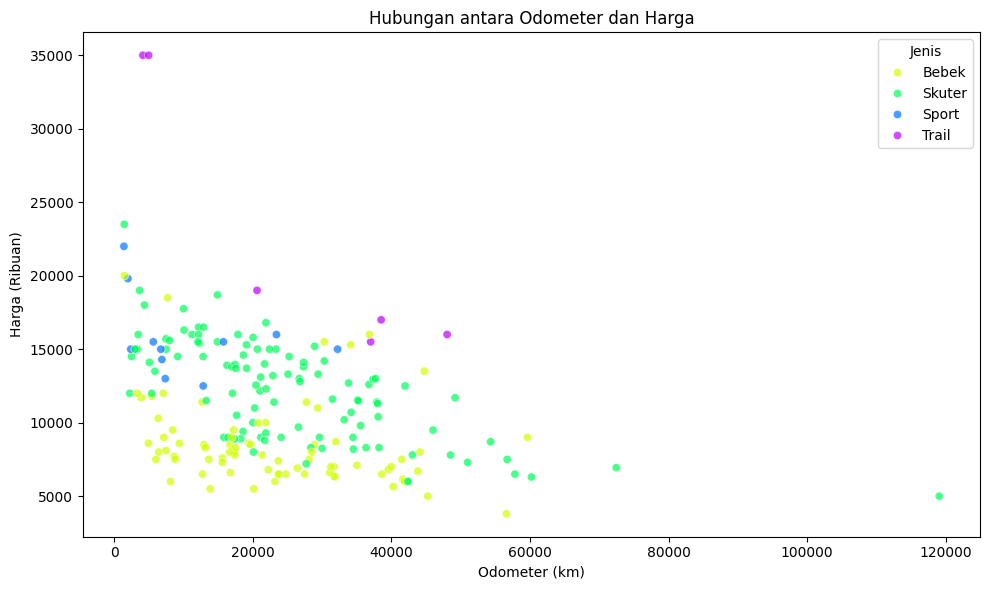

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='odometer', y='harga', hue='jenis', data=df, palette='hsv', alpha=0.7)
plt.title('Hubungan antara Odometer dan Harga')
plt.xlabel('Odometer (km)')
plt.ylabel('Harga (Ribuan)')
plt.legend(title='Jenis')
plt.tight_layout()

/tmp/ipython-input-3555432833.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='jenis', y='harga', data=df, order=order_jenis, palette='Pastel1')


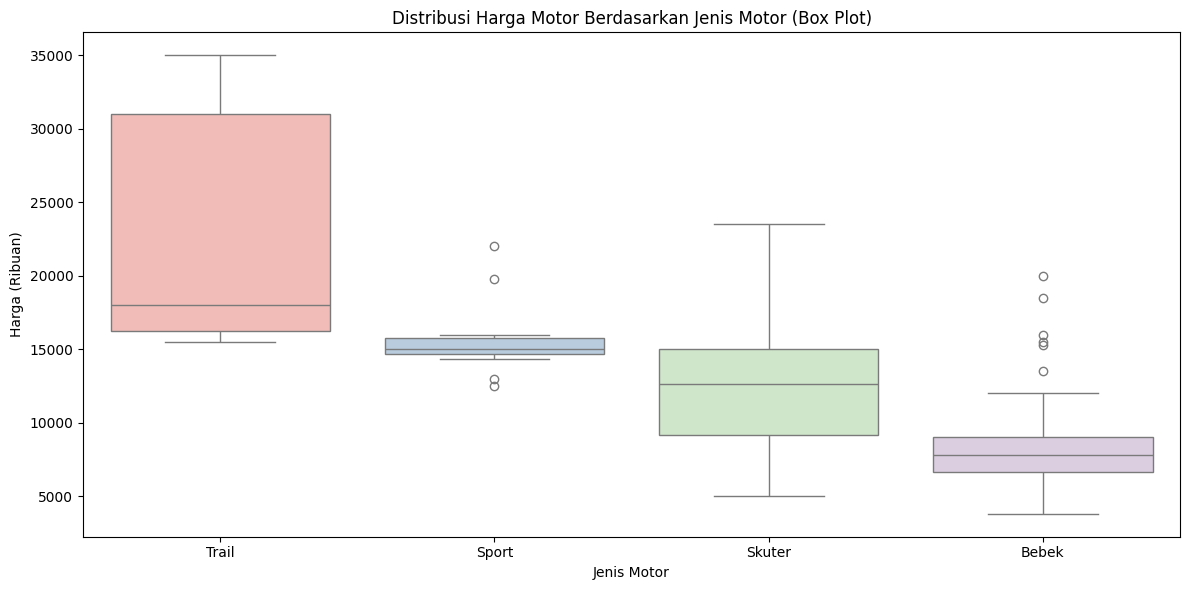

In [18]:
plt.figure(figsize=(12, 6))
order_jenis = df.groupby('jenis')['harga'].median().sort_values(ascending=False).index
sns.boxplot(x='jenis', y='harga', data=df, order=order_jenis, palette='Pastel1')
plt.title('Distribusi Harga Motor Berdasarkan Jenis Motor (Box Plot)')
plt.xlabel('Jenis Motor')
plt.ylabel('Harga (Ribuan)')
plt.tight_layout()

/tmp/ipython-input-1496033702.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='transmisi', y='harga', data=df, order=order_transmisi, palette='Pastel2')


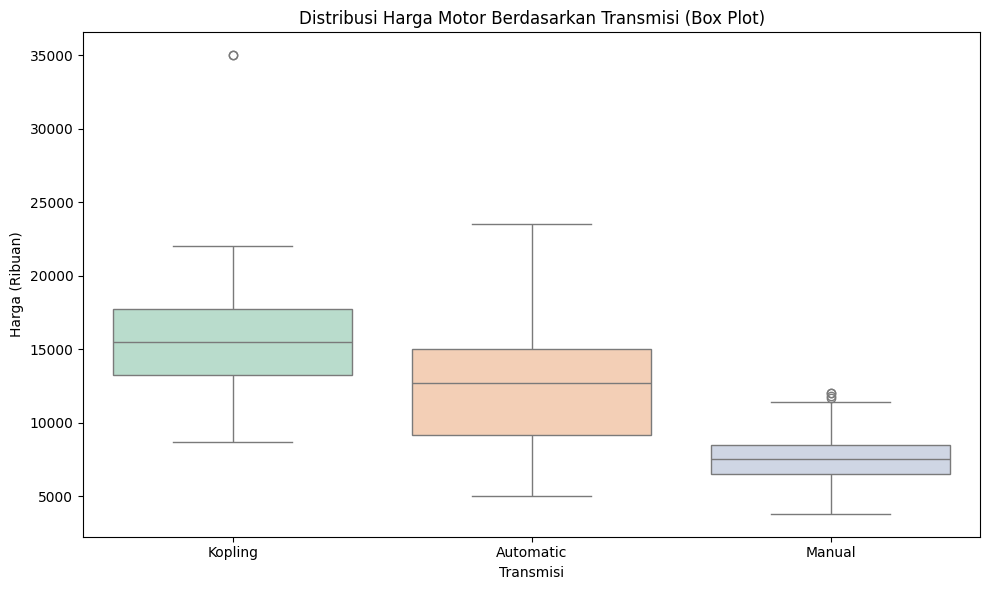

In [19]:
plt.figure(figsize=(10, 6))
order_transmisi = df.groupby('transmisi')['harga'].median().sort_values(ascending=False).index
sns.boxplot(x='transmisi', y='harga', data=df, order=order_transmisi, palette='Pastel2')
plt.title('Distribusi Harga Motor Berdasarkan Transmisi (Box Plot)')
plt.xlabel('Transmisi')
plt.ylabel('Harga (Ribuan)')
plt.tight_layout()